In [1]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
import pandas as pd
maindf = pd.read_excel('Book 2.xlsx')
print(maindf.head())
print(maindf.columns)

        Date     Open     High      Low   Close   Adj Close        Volume
0 2018-01-01  14112.2  14112.2  13154.7  13657.2     13657.2  10291200000
1 2018-01-02  13625.0  15444.6  13163.6  14982.1     14982.1  16846600192
2 2018-01-03  14978.2  15572.8  14844.5  15201.0     15201.0  16871900160
3 2018-01-04  15270.7  15739.7  14522.2  15599.2     15599.2  21783199744
4 2018-01-05  15477.2  17705.2  15202.8  17429.5     17429.5  23840899072
Index(['Date', 'Open', 'High', 'Low', 'Close ', 'Adj Close ', 'Volume'], dtype='object')


In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2902
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(2902, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.2,14112.2,13154.7,13657.2,13657.2,10291200000
1,2018-01-02,13625.0,15444.6,13163.6,14982.1,14982.1,16846600192
2,2018-01-03,14978.2,15572.8,14844.5,15201.0,15201.0,16871900160
3,2018-01-04,15270.7,15739.7,14522.2,15599.2,15599.2,21783199744
4,2018-01-05,15477.2,17705.2,15202.8,17429.5,17429.5,23840899072


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2897,2025-12-07,89277.81,91740.84,87799.56,90405.64,90405.64,47394898960
2898,2025-12-08,90424.59,92267.12,89644.89,90640.20,90640.20,57394099056
2899,2025-12-09,90639.70,94601.57,89586.98,92691.71,92691.71,66861721440
2900,2025-12-10,92695.23,94477.16,91640.13,92020.95,92020.95,65420694513
2901,2025-12-12,92522.48,92690.37,91506.99,92478.34,92478.34,61191278592


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2902 non-null   datetime64[ns]
 1   Open        2902 non-null   float64       
 2   High        2902 non-null   float64       
 3   Low         2902 non-null   float64       
 4   Close       2902 non-null   float64       
 5   Adj Close   2902 non-null   float64       
 6   Volume      2902 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 158.8 KB


In [8]:
maindf.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2902,2902.000000,2902.000000,2902.000000,2902.000000,2902.000000,2.902000e+03
mean,2021-12-21 12:00:29.772570624,36900.035258,37634.384080,36119.721309,36925.496775,36925.496775,3.015480e+10
min,2018-01-01 00:00:00,3236.270000,3275.380000,3191.300000,3236.760000,3236.760000,2.923670e+09
25%,2019-12-27 06:00:00,9426.580000,9594.710000,9255.317500,9427.850000,9427.850000,1.526245e+10
50%,2021-12-21 12:00:00,27147.760000,27481.440000,26740.880000,27176.170000,27176.170000,2.603060e+10
75%,2023-12-16 18:00:00,56905.002500,58212.235000,54995.015000,56968.810000,56968.810000,3.952286e+10
max,2025-12-12 00:00:00,124752.140000,126198.070000,123196.050000,124752.530000,124752.530000,3.509679e+11
std,NaN,32036.590823,32561.500137,31476.374043,32049.455208,32049.455208,2.201935e+10


## Checking for Null Values

In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [11]:
maindf.shape

(2902, 7)

In [12]:
import pandas as pd

maindf = pd.read_excel("Book 2.xlsx")

# --- Fix messy column names ---
maindf.columns = (
    maindf.columns
    .str.replace('\xa0', '', regex=False)   # remove non-breaking spaces
    .str.strip()                            # remove normal spaces
)

print(maindf.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


## 4. EDA(Exploratory Data Analysis)

In [13]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2018-01-01 00:00:00
Ending Date 2025-12-12 00:00:00


/var/folders/c_/1fd9z18j7c33d15_dy8d5_qh0000gn/T/ipykernel_6810/1507586809.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd=maindf.iloc[0][0]
/var/folders/c_/1fd9z18j7c33d15_dy8d5_qh0000gn/T/ipykernel_6810/1507586809.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ed=maindf.iloc[-1][0]


# Analysis of Year 2018

In [14]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)


,Date,Open,High,Low,Close
0,2018-01-01,14112.20,14112.20,13154.70,13657.20
1,2018-01-02,13625.00,15444.60,13163.60,14982.10
2,2018-01-03,14978.20,15572.80,14844.50,15201.00
3,2018-01-04,15270.70,15739.70,14522.20,15599.20
4,2018-01-05,15477.20,17705.20,15202.80,17429.50
...,...,...,...,...,...
360,2018-12-27,3854.69,3874.42,3645.45,3654.83
361,2018-12-28,3653.13,3956.14,3642.63,3923.92
362,2018-12-29,3932.49,3963.76,3820.41,3820.41
363,2018-12-30,3822.38,3901.91,3797.22,3865.95


In [15]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13212.074194,13085.558065
February,9462.242857,9472.001071
March,9156.591613,9040.557097
April,7963.618333,8033.596667
May,8505.240645,8450.997742
June,6829.258000,6793.507667
July,7101.466452,7146.350000
August,6723.800968,6700.130000
September,6622.821333,6610.675000


In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [17]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [18]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2018,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: WHITE BACKGROUND
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2019

In [19]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
365,2019-01-01,3746.71,3850.91,3707.23,3843.52
366,2019-01-02,3849.22,3947.98,3817.41,3943.41
367,2019-01-03,3931.05,3935.69,3826.22,3836.74
368,2019-01-04,3832.04,3865.93,3783.85,3857.72
369,2019-01-05,3851.97,3904.90,3836.90,3845.19
...,...,...,...,...,...
725,2019-12-27,7238.14,7363.53,7189.93,7290.09
726,2019-12-28,7289.03,7399.04,7286.91,7317.99
727,2019-12-29,7317.65,7513.95,7279.87,7422.65
728,2019-12-30,7420.27,7454.82,7276.31,7293.00


In [20]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3709.705806,3701.555161
February,3697.178929,3711.907857
March,3967.739677,3976.070000
April,5136.813667,5178.470333
May,7205.207742,7309.695161
June,9339.479333,9415.900333
July,10691.706774,10669.336452
August,10657.745484,10643.247742
September,9858.142000,9814.068000


In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [22]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [23]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2019,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIXED: use column names
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: prevent black background
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2020

In [24]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
730,2020-01-01,7194.89,7254.33,7174.94,7200.17
731,2020-01-02,7202.55,7212.16,6935.27,6985.47
732,2020-01-03,6984.43,7413.72,6915.00,7344.88
733,2020-01-04,7345.38,7427.39,7309.51,7410.66
734,2020-01-05,7410.45,7544.50,7400.54,7411.32
...,...,...,...,...,...
1091,2020-12-27,26439.37,28288.84,25922.77,26272.29
1092,2020-12-28,26280.82,27389.11,26207.64,27084.81
1093,2020-12-29,27081.81,27370.72,25987.30,27362.44
1094,2020-12-30,27360.09,28937.74,27360.09,28840.95


In [25]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8318.949355,8389.270000
February,9656.214828,9630.722069
March,6943.507419,6871.015484
April,7150.611000,7224.477000
May,9237.762258,9263.152258
June,9499.797333,9489.226333
July,9519.382903,9589.899355
August,11639.097742,11652.393871
September,10689.700000,10660.277667


In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [27]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [28]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2020,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: prevent black background in PyCharm
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2021

In [29]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1096,2021-01-01,28994.01,29600.63,28803.59,29374.15
1097,2021-01-02,29376.46,33155.12,29091.18,32127.27
1098,2021-01-03,32129.41,34608.56,32052.32,32782.02
1099,2021-01-04,32810.95,33440.22,28722.76,31971.91
1100,2021-01-05,31977.04,34437.59,30221.19,33992.43
...,...,...,...,...,...
1455,2021-12-26,50428.69,51196.38,49623.11,50809.52
1456,2021-12-27,50802.61,51956.33,50499.47,50640.42
1457,2021-12-28,50679.86,50679.86,47414.21,47588.86
1458,2021-12-29,47623.87,48119.74,46201.50,46444.71


In [30]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.962258,34761.649677
February,45874.968214,46306.799286
March,54544.678387,54998.008065
April,57251.256333,57206.719333
May,47105.828387,46443.287419
June,35920.547000,35845.156000
July,34234.212581,34444.975161
August,45516.120323,45709.022581
September,46041.858667,45939.771667


In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [32]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [33]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2021,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: prevent black background covering labels
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2022

In [34]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1461,2022-01-01,46311.75,47827.31,46288.48,47686.81
1462,2022-01-02,47680.93,47881.41,46856.94,47345.22
1463,2022-01-03,47343.54,47510.73,45835.96,46458.12
1464,2022-01-04,46458.85,47406.55,45752.46,45897.57
1465,2022-01-05,45899.36,46929.05,42798.22,43569.00
...,...,...,...,...,...
1820,2022-12-26,16842.25,16920.12,16812.37,16919.80
1821,2022-12-27,16919.29,16959.85,16642.07,16717.17
1822,2022-12-28,16716.40,16768.17,16497.56,16552.57
1823,2022-12-29,16552.32,16651.76,16508.68,16642.34


In [35]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073548,41114.421935
February,40591.103571,40763.474643
March,41889.149032,41966.237742
April,41694.654333,41435.319000
May,31900.711935,31706.104839
June,24783.338000,24383.685333
July,21424.732258,21539.254516
August,22471.866452,22366.266129
September,19821.352667,19804.779333


In [36]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [37]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [38]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2022,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: prevent dark background in PyCharm
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2023

In [39]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2023-12-31')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1826,2023-01-01,16547.91,16630.44,16521.23,16625.08
1827,2023-01-02,16625.51,16759.34,16572.23,16688.47
1828,2023-01-03,16688.85,16760.45,16622.37,16679.86
1829,2023-01-04,16680.21,16964.59,16667.76,16863.24
1830,2023-01-05,16863.47,16884.02,16790.28,16836.74
...,...,...,...,...,...
2185,2023-12-26,43599.85,43603.18,41676.49,42520.40
2186,2023-12-27,42518.47,43683.16,42167.58,43442.86
2187,2023-12-28,43468.20,43804.78,42318.55,42627.86
2188,2023-12-29,42614.64,43124.32,41424.06,42099.40


In [40]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860645,20250.717742
February,23304.086786,23304.538571
March,24945.340323,25116.900968
April,28823.841667,28857.574667
May,27562.721935,27499.307742
June,27651.926000,27763.199000
July,30098.767419,30057.470323
August,27959.755806,27852.792258
September,26271.268333,26306.136667


In [41]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [42]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [43]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2023,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names, not Series
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: MAKE BACKGROUND WHITE IN PYCHARM
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Analysis of Year 2024

In [44]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2024 = maindf.loc[(maindf['Date'] >= '2024-01-01')
                     & (maindf['Date'] < '2024-12-31')]

y_2024.drop(y_2024[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2191,2024-01-01,42280.23,44175.44,42214.98,44167.33
2192,2024-01-02,44187.14,45899.71,44176.95,44957.97
2193,2024-01-03,44961.60,45503.24,40813.54,42848.18
2194,2024-01-04,42855.82,44770.02,42675.18,44179.92
2195,2024-01-05,44192.98,44353.29,42784.72,44162.69
...,...,...,...,...,...
2551,2024-12-26,99297.70,99884.57,95137.88,95795.52
2552,2024-12-27,95704.98,97294.84,93310.74,94164.86
2553,2024-12-28,94160.19,95525.90,94014.29,95163.93
2554,2024-12-29,95174.05,95174.88,92881.79,93530.23


In [45]:
monthvise= y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,42910.015161,42919.613226
February,49231.727586,49875.174138
March,67372.752258,67702.438065
April,66239.901000,65882.380000
May,65044.211935,65266.316774
June,66058.262667,65899.466333
July,62737.764516,62804.542258
August,60103.896774,59921.197742
September,60213.193000,60358.516000


In [46]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [47]:
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2024.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [48]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2024,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: prevent black background in PyCharm
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Analysis of Year 2025

In [49]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2025 = maindf.loc[(maindf['Date'] >= '2025-01-01')
                     & (maindf['Date'] < '2025-12-12')]

y_2025.drop(y_2025[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2557,2025-01-01,93425.10,94929.87,92788.13,94419.76
2558,2025-01-02,94416.29,97739.82,94201.57,96886.88
2559,2025-01-03,96881.73,98956.91,96034.62,98107.43
2560,2025-01-04,98106.99,98734.43,97562.98,98236.23
2561,2025-01-05,98233.91,98813.30,97291.77,98314.96
...,...,...,...,...,...
2896,2025-12-06,89389.36,90267.46,88951.66,89272.38
2897,2025-12-07,89277.81,91740.84,87799.56,90405.64
2898,2025-12-08,90424.59,92267.12,89644.89,90640.20
2899,2025-12-09,90639.70,94601.57,89586.98,92691.71


In [50]:
monthvise= y_2025.groupby(y_2025['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,99707.716129,99992.847742
February,95922.147857,95290.710000
March,85135.397097,85075.979677
April,86059.375000,86447.714667
May,103306.361290,103644.515484
June,105742.070333,105825.247000
July,115085.798387,115363.235161
August,115076.924516,114834.939032
September,112976.467333,113173.047667


In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [52]:
y_2025.groupby(y_2025['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2025.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2025.groupby(y_2025['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()


In [53]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_2025,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names, NOT series
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: white background so labels do not get covered
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Overall Analysis from 2018-2025

In [54]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] <= '2025-12-12')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-01-01,14112.20,14112.20,13154.70,13657.20
1,2018-01-02,13625.00,15444.60,13163.60,14982.10
2,2018-01-03,14978.20,15572.80,14844.50,15201.00
3,2018-01-04,15270.70,15739.70,14522.20,15599.20
4,2018-01-05,15477.20,17705.20,15202.80,17429.50
...,...,...,...,...,...
2897,2025-12-07,89277.81,91740.84,87799.56,90405.64
2898,2025-12-08,90424.59,92267.12,89644.89,90640.20
2899,2025-12-09,90639.70,94601.57,89586.98,92691.71
2900,2025-12-10,92695.23,94477.16,91640.13,92020.95


In [55]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,32990.419637,33026.954194
February,34670.790796,34749.801195
March,36744.394476,36843.400887
April,37540.008917,37533.281458
May,37483.505766,37447.922177
June,35728.084833,35676.923500
July,36361.728911,36451.882903
August,37518.651008,37459.998669
September,36561.850417,36583.409000


In [56]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(
    y_overall,
    x='Date',
    y=['Open', 'Close', 'High', 'Low'],   # FIX: use column names, not series
    labels={'Date': 'Date', 'value': 'Stock value'}
)

fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters',

    # FIX: white background so labels become visible in PyCharm
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [57]:
## 5. Building LSTM Model
## First Step is Preparing Data for Training and Testing
## As we want to predict Close Price of the Bitcoin so we are just Considering Close and Date

In [58]:
# Lets First Take all the Close Price  
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2902, 2)


In [59]:
fig = px.line(
    closedf,
    x='Date',
    y='Close',
    labels={'Date': 'Date', 'Close': 'Close Stock'}   # FIXED labels
)

fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')

fig.update_layout(
    title_text='Whole period of timeframe of Bitcoin close price 2018-2025',
    plot_bgcolor='white',
    paper_bgcolor='white',        # FIX: avoid black PyCharm background
    font_size=15,
    font_color='black'
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Now we will Take data of 4 Years

In [60]:
# data from Feb 2021 → Novstre 2025
closedf = closedf[(closedf['Date'] >= '2021-08-31') & (closedf['Date'] <= '2025-12-12')]
close_stock = closedf.copy()
print("Total data for prediction:", closedf.shape[0])

Total data for prediction: 1564


In [61]:
closedf

,Date,Close
1338,2021-08-31,47166.69
1339,2021-09-01,48847.03
1340,2021-09-02,49327.72
1341,2021-09-03,50025.38
1342,2021-09-04,49944.63
...,...,...
2897,2025-12-07,90405.64
2898,2025-12-08,90640.20
2899,2025-12-09,92691.71
2900,2025-12-10,92020.95


In [62]:
fig = px.line(
    closedf,
    x=closedf['Date'],
    y=closedf['Close'],
    labels={'Date': 'Date', 'Close': 'Close Stock'}
)

fig.update_traces(
    line_color='crimson',
    line_width=2,
    opacity=0.8
)

fig.update_layout(
    title_text='Considered period to predict Bitcoin close price',
    plot_bgcolor='white',
    paper_bgcolor='white',     # ⭐ REQUIRED FIX for labels inside PyCharm
    font_size=15,
    font_color='black'
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [63]:
## Normalizing Data
## Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
## MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [64]:
# --- 1. Delete the Date column ---
closedf = closedf.drop(columns=['Date'])   # safer than “del closedf['Date']”

# --- 2. Scale the Close values between 0 and 1 ---
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))

print("Scaled data shape:", closedf.shape)

Scaled data shape: (1564, 1)


In [65]:
## Slicing data into Training set and Testing set

In [66]:
training_size = int(len(closedf) * 0.8)
test_size = len(closedf) - training_size

train_data = closedf[0:training_size, :]
test_data = closedf[training_size:, :]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1251, 1)
Testing data shape: (313, 1)


In [67]:
## Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 60

In [68]:
# Function to create time-series dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []

    for i in range(len(dataset) - time_step - 1):
        # Take 'time_step' number of past values to predict the next one
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)


In [69]:
# Define time step and create train/test sequences
time_step = 60  # 60 days = look-back window

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1190, 60)
y_train shape: (1190,)
X_test shape: (252, 60)
y_test shape: (252,)


In [70]:
# Reshape input to [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1190, 60, 1)
X_test shape: (252, 60, 1)


## Actuall Model Building

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    LSTM(
        50,
        return_sequences=True,
        activation="tanh",
        input_shape=(X_train.shape[1], 1)
    ),
    Dropout(0.2),

    LSTM(
        30,
        activation="tanh"
    ),

    Dense(1)
])


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [72]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0136 - val_loss: 0.0043
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6046e-04 - val_loss: 0.0020
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7386e-04 - val_loss: 0.0017
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4559e-04 - val_loss: 0.0021
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0659e-04 - val_loss: 0.0017
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8459e-04 - val_loss: 0.0015
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.3438e-04 - val_loss: 0.0022
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.0063e-04 - val_loss: 0.0014
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3232e-04 - val_loss: 0.0013
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9942e-04 - val_loss: 0.0017
Epoch 12/200
38/3

In [73]:
# Save the model safely for Streamlit / Flask
model.save("btc_webapp/model/lstm_model.h5")

print("✅ Model saved successfully!")

✅ Model saved successfully!


In [74]:
import numpy as np
import pickle

# -----------------------------
# Save the scaler
# -----------------------------
with open("btc_webapp/model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved successfully!")

# -----------------------------
# Prepare last 60 scaled values
# Make sure 'closedf' is already scaled (shape: (n,1))
# -----------------------------
# closedf must be a numpy array like (n,1)
# If closedf is pandas Series → convert:
# closedf = closedf.values.reshape(-1,1)

# Take last 60 values and flatten to 1D
last_60 = closedf[-60:].reshape(60,)

# Save for your web app
np.save("btc_webapp/model/last_60_scaled.npy", last_60)

print("Saved clean last_60_scaled.npy with shape:", last_60.shape)

Scaler saved successfully!
Saved clean last_60_scaled.npy with shape: (60,)


In [75]:
import pandas as pd

# STEP 1: Load raw Excel file from ROOT folder
df = pd.read_excel("Book 2.xlsx")

# STEP 2: Clean column names (spaces + hidden unicode)
df.columns = (
    df.columns
    .astype(str)
    .str.strip()
    .str.replace(" ", "", regex=False)
    .str.replace("\xa0", "", regex=False)
)

# STEP 3: Save cleaned CSV into webapp/model
output_path = "btc_webapp/model/btc_history.csv"
df.to_csv(output_path, index=False)

# STEP 4: Verification
print("✅ Cleaned columns:")
print(df.columns.tolist())

print(f"\n✅ btc_history.csv successfully created at:\n{output_path}")

✅ Cleaned columns:
['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']

✅ btc_history.csv successfully created at:
btc_webapp/model/btc_history.csv


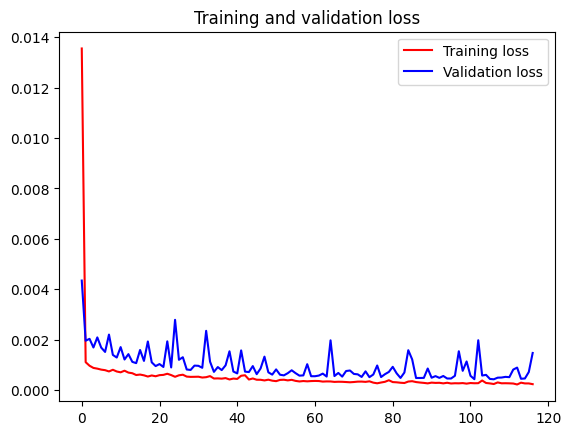

<Figure size 640x480 with 0 Axes>

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [77]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.to_csv("btc_webapp/model/training_history.csv", index=False)

In [78]:
# Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print(train_predict.shape, test_predict.shape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1190, 1) (252, 1)


## Model Evaluation

In [79]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_rmse = math.sqrt(mean_squared_error(original_ytrain, train_predict))
train_mse = mean_squared_error(original_ytrain, train_predict)
train_mae = mean_absolute_error(original_ytrain, train_predict)

test_rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
test_mse = mean_squared_error(original_ytest, test_predict)
test_mae = mean_absolute_error(original_ytest, test_predict)

print("Model Evaluation Metrics")
print("-----------------------------------------------------")
print(f"Train RMSE : {train_rmse:.2f}")
print(f"Train MSE  : {train_mse:.2f}")
print(f"Train MAE  : {train_mae:.2f}")
print("-----------------------------------------------------")
print(f"Test RMSE  : {test_rmse:.2f}")
print(f"Test MSE   : {test_mse:.2f}")
print(f"Test MAE   : {test_mae:.2f}")

Model Evaluation Metrics
-----------------------------------------------------
Train RMSE : 1462.04
Train MSE  : 2137574.47
Train MAE  : 979.90
-----------------------------------------------------
Test RMSE  : 2241.47
Test MSE   : 5024186.59
Test MAE   : 1677.85


## Variance Regression Score

In [81]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))

print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9956875282339671
Test data explained variance regression score: 0.9580663420131567


## R square score for regression

In [82]:
from sklearn.metrics import r2_score

# R² (Coefficient of Determination) — closer to 1 = better fit
train_r2 = r2_score(original_ytrain, train_predict)
test_r2 = r2_score(original_ytest, test_predict)

print("📊 R² (Coefficient of Determination)")
print("-----------------------------------------------------")
print(f"Train Data R² Score : {train_r2:.4f}")
print(f"Test Data  R² Score : {test_r2:.4f}")

if test_r2 > 0.85:
    print("Excellent predictive performance.")
elif test_r2 > 0.6:
    print("Reasonable fit — can improve with more data or tuning.")
else:
    print("Model underfitting — try increasing time_step or retraining with newer data.")

📊 R² (Coefficient of Determination)
-----------------------------------------------------
Train Data R² Score : 0.9957
Test Data  R² Score : 0.9581
Excellent predictive performance.


## Comparision of original Bitcoin close price and predicted close price

In [83]:
look_back = time_step

# Create empty arrays for plotting
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(closedf) - 1, :] = test_predict

# DataFrame for plotting
plotdf = pd.DataFrame({
    'Date': close_stock['Date'].reset_index(drop=True),
    'Original_Close': close_stock['Close'].reset_index(drop=True),
    'Train_Predicted': trainPredictPlot.reshape(-1),
    'Test_Predicted': testPredictPlot.reshape(-1)
})

names = cycle(['Original Close Price', 'Train Predicted Close', 'Test Predicted Close'])

# Plotting
fig = px.line(
    plotdf,
    x='Date',
    y=['Original_Close', 'Train_Predicted', 'Test_Predicted'],
    labels={
        'Date': 'Date',
        'value': 'Price (USD)'        # Y-axis label
    }
)

fig.update_layout(
    title_text='Original vs Predicted Close Prices (Train & Test)',
    plot_bgcolor='white',
    paper_bgcolor='white',           # IMPORTANT FIX for PyCharm
    font_size=14,
    font_color='black',
    legend_title_text='Price Type'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Predicting next 365 days

In [84]:
from numpy import array

# Take the last "time_step" values from the test set
x_input = test_data[-time_step:].reshape(1, -1)

temp_input = list(x_input[0])   # convert to list
lst_output = []

n_steps = time_step
pred_days = 365   # ⭐ Predict 1 full year

for i in range(pred_days):
    # take last n steps and reshape for LSTM
    x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))

    # predict next value
    yhat = model.predict(x_input, verbose=0)

    # append prediction to sequence
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])

print("Predicted next days:", len(lst_output))

Predicted next days: 365


## Plotting last 60 days of dataset and next predicted 365 days

In [85]:
last_days = np.arange(1, time_step + 1)
day_pred = np.arange(time_step + 1, time_step + pred_days + 1)

print("Last observed days indices:", last_days)
print("Future predicted days indices:", day_pred)

Last observed days indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Future predicted days indices: [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 24

In [86]:
# Inverse transform
last_original = scaler.inverse_transform(closedf[-time_step:])
future_predicted = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Combine the last 60 days + future 365 predicted days
combined = np.concatenate((last_original.flatten(), future_predicted.flatten()))

# Create DataFrame for plotting
new_pred_plot = pd.DataFrame({
    'Days': np.arange(1, len(combined) + 1),
    'Price': combined
})

# Plot
fig = px.line(
    new_pred_plot,
    x='Days',
    y='Price',
    title='Last 60 Days + Predicted Next 365 Days Bitcoin Price',   # UPDATED
    labels={'Price': 'Price (USD)', 'Days': 'Time Steps'}
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',    # Keeps PyCharm background clean
    font_size=14,
    font_color='black'
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Plotting entire Closing Stock Price with next 365 days period of prediction

In [87]:
# --- 1. Create lstmdf (actual + predicted values) ---

# Convert scaled closedf back to list
lstmdf = closedf.tolist()

# Add future predictions (still scaled)
lstmdf.extend((np.array(lst_output).reshape(-1, 1)).tolist())

# Inverse transform everything back to original price
lstmdf = scaler.inverse_transform(lstmdf).reshape(1, -1).tolist()[0]

# --- 2. Convert to DataFrame for Plotly ---

dfplot = pd.DataFrame({
    'Timestamp': range(len(lstmdf)),
    'Close_Price': lstmdf
})

# --- 3. Plotting ---

names = cycle(['Close price'])

fig = px.line(
    dfplot,
    x='Timestamp',
    y='Close_Price',
    labels={'Timestamp': 'Timestamp', 'Close_Price': 'Stock price'}
)

fig.update_layout(
    title_text='Plotting whole closing stock price with prediction',
    plot_bgcolor='white',
    paper_bgcolor='white',     # FIX for PyCharm background
    font_size=15,
    font_color='black',
    legend_title_text='Stock'
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [88]:
# Get the last date from the dataset
last_date = pd.to_datetime(close_stock['Date'].max())
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=pred_days)

# Convert predictions back to original scale
future_predicted = scaler.inverse_transform(
    np.array(lst_output).reshape(-1, 1)
).flatten()

# Create DataFrame for plotting
pred_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_predicted
})

# Plot
fig = px.line(
    pred_df,
    x='Date',
    y='Predicted_Close',
    title='Predicted Bitcoin Daily Close Price (Next 365 Days)',   # UPDATED
    labels={
        'Predicted_Close': 'Predicted Price (USD)',
        'Date': 'Date'
    },
    color_discrete_sequence=['goldenrod']
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',      # FIX FOR PYCHARM BACKGROUND
    font_size=15,
    font_color='black'
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Save predictions to CSV
pred_df.to_csv('Predicted_Bitcoin_Prices_Next_365_Days.csv', index=False)

In [89]:
import pandas as pd
df = pd.read_csv("btc_webapp/model/btc_history.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume'], dtype='object')
